<a href="https://colab.research.google.com/github/Kingdms/Neural_net_project/blob/main/Neural_net_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
bank = pd.read_csv("/content/drive/MyDrive/DataSet/Churn_Modelling.csv")

In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
bank = bank.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1)

In [23]:
geo_one_hot = pd.get_dummies(bank['Geography'], prefix='Geo')
bank = pd.concat([bank, geo_one_hot], axis=1)
bank = bank.drop(['Geography'], axis=1)

In [24]:
geo_one_hot

,Geo_France,Geo_Germany,Geo_Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [25]:
bank['Gender'] = bank['Gender'].map({'Female': 0, 'Male': 1})

In [26]:
bank = bank.sample(frac=1, random_state=42).reset_index(drop=True)


In [27]:
X = bank.drop('Exited', axis=1).values.astype(float)
y = bank['Exited'].values.astype(int)

In [37]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [29]:

X_mean = X.mean(axis=0)
X_std = X.std(axis=0) + 1e-8
X = (X - X_mean) / X_std

In [30]:
# Manual train-test split (80% train, 20% test)
N = X.shape[0]
split = int(N * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [31]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N, K))
    for i in range(N):
        Y[i, int(y[i])] = 1
    return Y

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def cross_entropy(Y, P_hat):
    return -np.sum(Y * np.log(P_hat + 1e-8))

def softmax(A):
    expA = np.exp(A - np.max(A, axis=1, keepdims=True))
    return expA / expA.sum(axis=1, keepdims=True)


# Shallow Neural Network Class

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):

    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))


In [33]:
class Shallow_ANN_Binary:
    def fit(self, X, y, neurons=6, eta=0.01, epochs=2000, show_curve=True):
        N, D = X.shape

        self.W1 = np.random.randn(D, neurons) * np.sqrt(2. / D)
        self.B1 = np.zeros(neurons)
        self.W2 = np.random.randn(neurons, 1) * np.sqrt(2. / neurons)
        self.B2 = np.zeros(1)
        J = np.zeros(epochs)

        for epoch in range(epochs):

            Z1 = np.tanh(X @ self.W1 + self.B1)
            Z2 = sigmoid(Z1 @ self.W2 + self.B2)

            J[epoch] = binary_cross_entropy(y, Z2[:,0])


            dZ2 = Z2[:,0] - y
            dW2 = Z1.T @ dZ2.reshape(-1,1) / N
            dB2 = np.sum(dZ2) / N

            dZ1 = (dZ2.reshape(-1,1) @ self.W2.T) * (1 - Z1**2)
            dW1 = X.T @ dZ1 / N
            dB1 = np.sum(dZ1, axis=0) / N

            # Gradient step
            self.W2 -= eta * dW2
            self.B2 -= eta * dB2
            self.W1 -= eta * dW1
            self.B1 -= eta * dB1

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.title("Training Loss Curve")
            plt.xlabel("Epochs")
            plt.ylabel("Binary Cross-Entropy Loss")
            plt.show()

        self.trained = True

    def predict_proba(self, X):
        Z1 = np.tanh(X @ self.W1 + self.B1)
        Z2 = sigmoid(Z1 @ self.W2 + self.B2)
        return Z2[:,0]

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

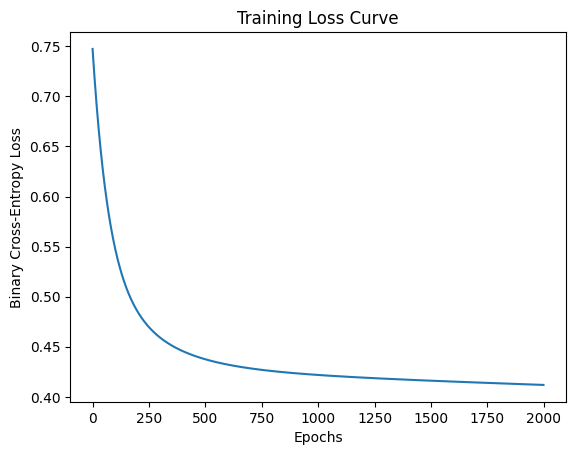

Precision: 0.49
Recall:    0.51
F1-score:  0.50
Confusion Matrix:
 [[1368  222]
 [ 200  210]]


In [34]:
ann_bin = Shallow_ANN_Binary()
ann_bin.fit(X_train, y_train, neurons=8, eta=0.02, epochs=2000, show_curve=True)

threshold = 0.3
y_pred = ann_bin.predict(X_test, threshold=threshold)

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1-score:  {f1:.2f}")
    print("Confusion Matrix:\n", cm)

classification_report(y_test, y_pred)


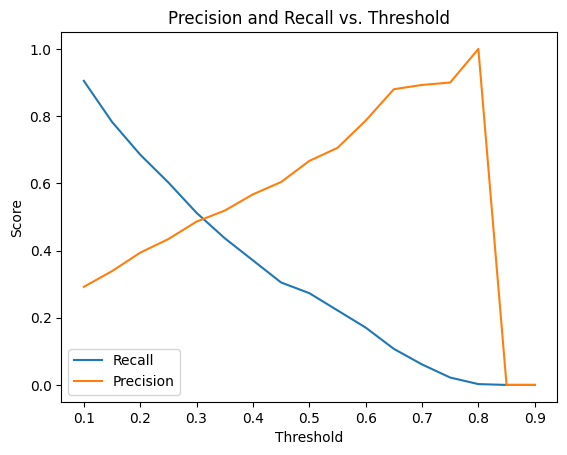

In [35]:
thresholds = np.arange(0.1, 0.91, 0.05)
recalls = []
precisions = []
for t in thresholds:
    yp = ann_bin.predict(X_test, threshold=t)
    cm = confusion_matrix(y_test, yp)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    recalls.append(recall)
    precisions.append(precision)

plt.figure()
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.show()


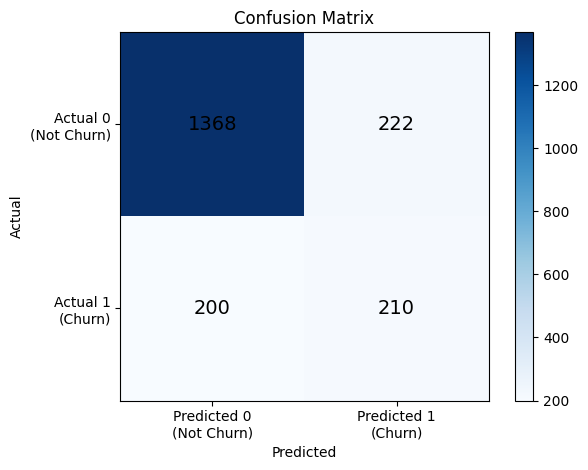

In [36]:
def confusion_matrix(y_true, y_pred):
    # For binary (0/1) case
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted 0\n(Not Churn)', 'Predicted 1\n(Churn)'])
ax.set_yticklabels(['Actual 0\n(Not Churn)', 'Actual 1\n(Churn)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar(im)
plt.tight_layout()
plt.show()